In [1]:
import warnings
warnings.simplefilter("ignore")

# 2차 Autoregressive (AR) 모형

## AR(2) 모형

2차 AR 모형 즉, AR(2) 모형은 백색 잡음의 현재값과 1스텝 과거의 자기 자신의 값, 그리고 2스텝 과거의 자기 자신의 값의 가중합으로 이루어진 모형이다. 수식은 다음과 같다.

$$ Y_t = -\phi_1 Y_{t-1} -\phi_2 Y_{t-2} + e_t $$


**시간 지연 연산자(lag operator) $L$**을 사용하면 위 식은 다음과 같이 표현할 수 있다.


$$ Y_t = -\phi_1 L Y_t -\phi_2 L^2 Y_t + e_t $$


$$ (1 +\phi_1 L +\phi_2 L^2 ) Y_t =  e_t $$


이 식을 변환한 다음과 같은 식을 **특성 다항식(characteristic polynomial)**이라 하고 

$$ 1 +\phi_1 x +\phi_2 x^2 $$


특성 다항식이 0이 되는 방정식을 **특정 방정식(characteristic equation)**이라고 한다.

$$ 1 +\phi_1 x +\phi_2 x^2 = 0 $$


AR(2) 모형이 정상 과정을 나타내려면 **특성 방정식의 해의 크기(modulus)가 1보다 커야 한다**.

사실 이 정상상태 조건은 차수와 관계없이 임의의 AR(p)모형에 대해서도 적용된다.


AR(2) 모형의 경우 특성 방정식의 해는 다음과 같다.

$$
\dfrac{-\phi_1 \pm \sqrt{\phi_1^2 - 4\phi_2}}{2\phi_2}
$$

두 해가 모두 절대값이 1보다 커야 한다는 조건을 변환하면 다음 조건들을 동시에 만족하는 것과 같다.

$$ \phi_1 + \phi_2 > -1 $$

$$ \phi_2 - \phi_1 > -1 $$

$$ \left| \phi_2 \right| < 1 $$


AR(2) 모형의 자기상관계수는 다음과 같이 계산 가능하다. 

우선 AR(2)의 자기공분산은 다음 관계를 만족한다. 이 식을 **Yule-Walker 방정식**이라고 한다.

$$ \gamma_k =-\phi_1\gamma_{k-1} -\phi_2\gamma_{k-2} = 0$$

이는 다음과 같이 증명할 수 있다.

$$
\begin{eqnarray}
\gamma_k = \text{E}[Y_t Y_{t-k}] 
&=& \text{E} \left[ (-\phi_1Y_{t-1} -\phi_2Y_{t-1} + e_{t})Y_{t-k} \right] \\
&=& -\text{E} \left[ \phi_1Y_{t-1}Y_{t-k} \right] -\text{E} \left[ \phi_2Y_{t-1}Y_{t-k} \right] + \text{E} \left[ e_{t}Y_{t-k} \right] \\
&=& -\phi_1 \gamma_{k-1} -\phi_2 \gamma_{k-2} 
\end{eqnarray}
$$


이 식을 $\gamma_0$로 나누면 자기상관계수에 대한 다음 식을 구할 수 있다. 
$$ \rho_k = -\phi_1\rho_{k-1}-\phi_2\rho_{k-2}  $$

$\rho_0 = 1$과 $\rho_{-k} = \rho_k$를 이용하면

$$ \rho_1 = -\phi_1\rho_{0} -\phi_2\rho_{-1} = -\phi_1 -\phi_2 \rho_1  $$


$$ \rho_1 = \dfrac{-\phi_1}{1+\phi_2}  $$

같은 방법으로 

$$ \rho_2 = \dfrac{\phi_1^2-\phi_2(1+\phi_2)}{1+\phi_2} $$

도 구할 수 있으며 

이를 $k$인 경우에 대해 확장하면 다음과 같다.

$$ \rho_k = \left( 1 + \dfrac{1-\phi_2}{1+\phi_2} \cdot k \right)\left(-\dfrac{\phi_1}{2} \right)^k $$

여러가지 $\phi_1$, $\phi_2$에 대해 AR(2) 모형의 자기상관계수 함수 즉, ACF를 그리면 다음과 같은 특성을 보인다.

* 시차가 증가하면서 자기상관계수의 절대값은 지수함수적으로 감소한다.
* 진동할 수 있다. 진동 주파수는 계수에 따라 달라진다.

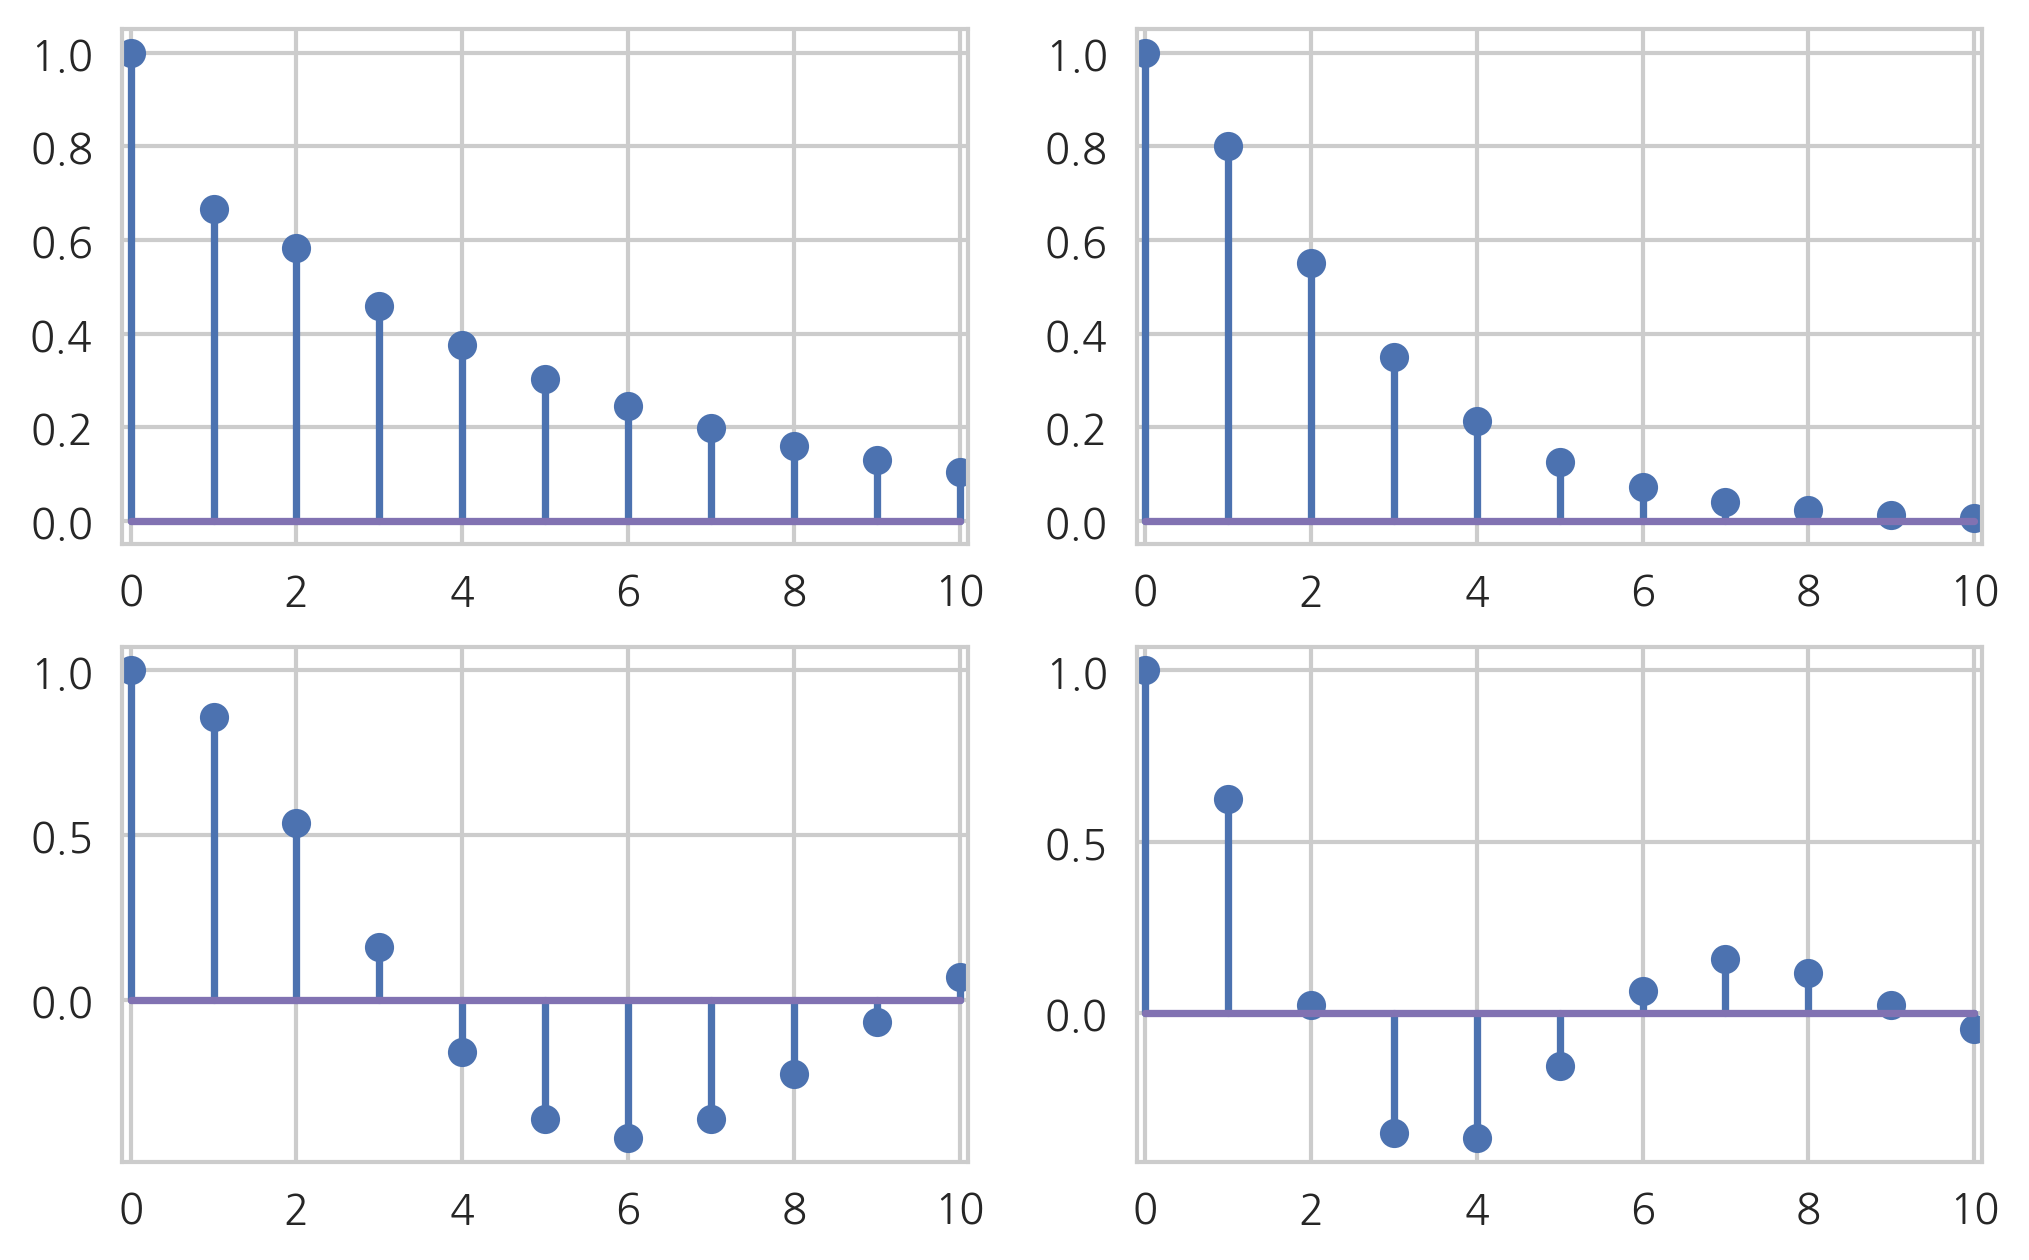

In [2]:
import statsmodels.api as sm

plt.subplot(221)
p1 = sm.tsa.ArmaProcess([1, -0.5, -0.25],[1])
plt.stem(p1.acf(11))
plt.xlim(-0.1, 10.1)

plt.subplot(222)
p1 = sm.tsa.ArmaProcess([1, -1, 0.25],[1])
plt.stem(p1.acf(11))
plt.xlim(-0.1, 10.1)

plt.subplot(223)
p1 = sm.tsa.ArmaProcess([1, -1.5, 0.75],[1])
plt.stem(p1.acf(11))
plt.xlim(-0.1, 10.1)

plt.subplot(224)
p1 = sm.tsa.ArmaProcess([1, -1, 0.6],[1])
plt.stem(p1.acf(11))
plt.xlim(-0.1, 10.1)

plt.show()

## AR(2) 모형의 시뮬레이션

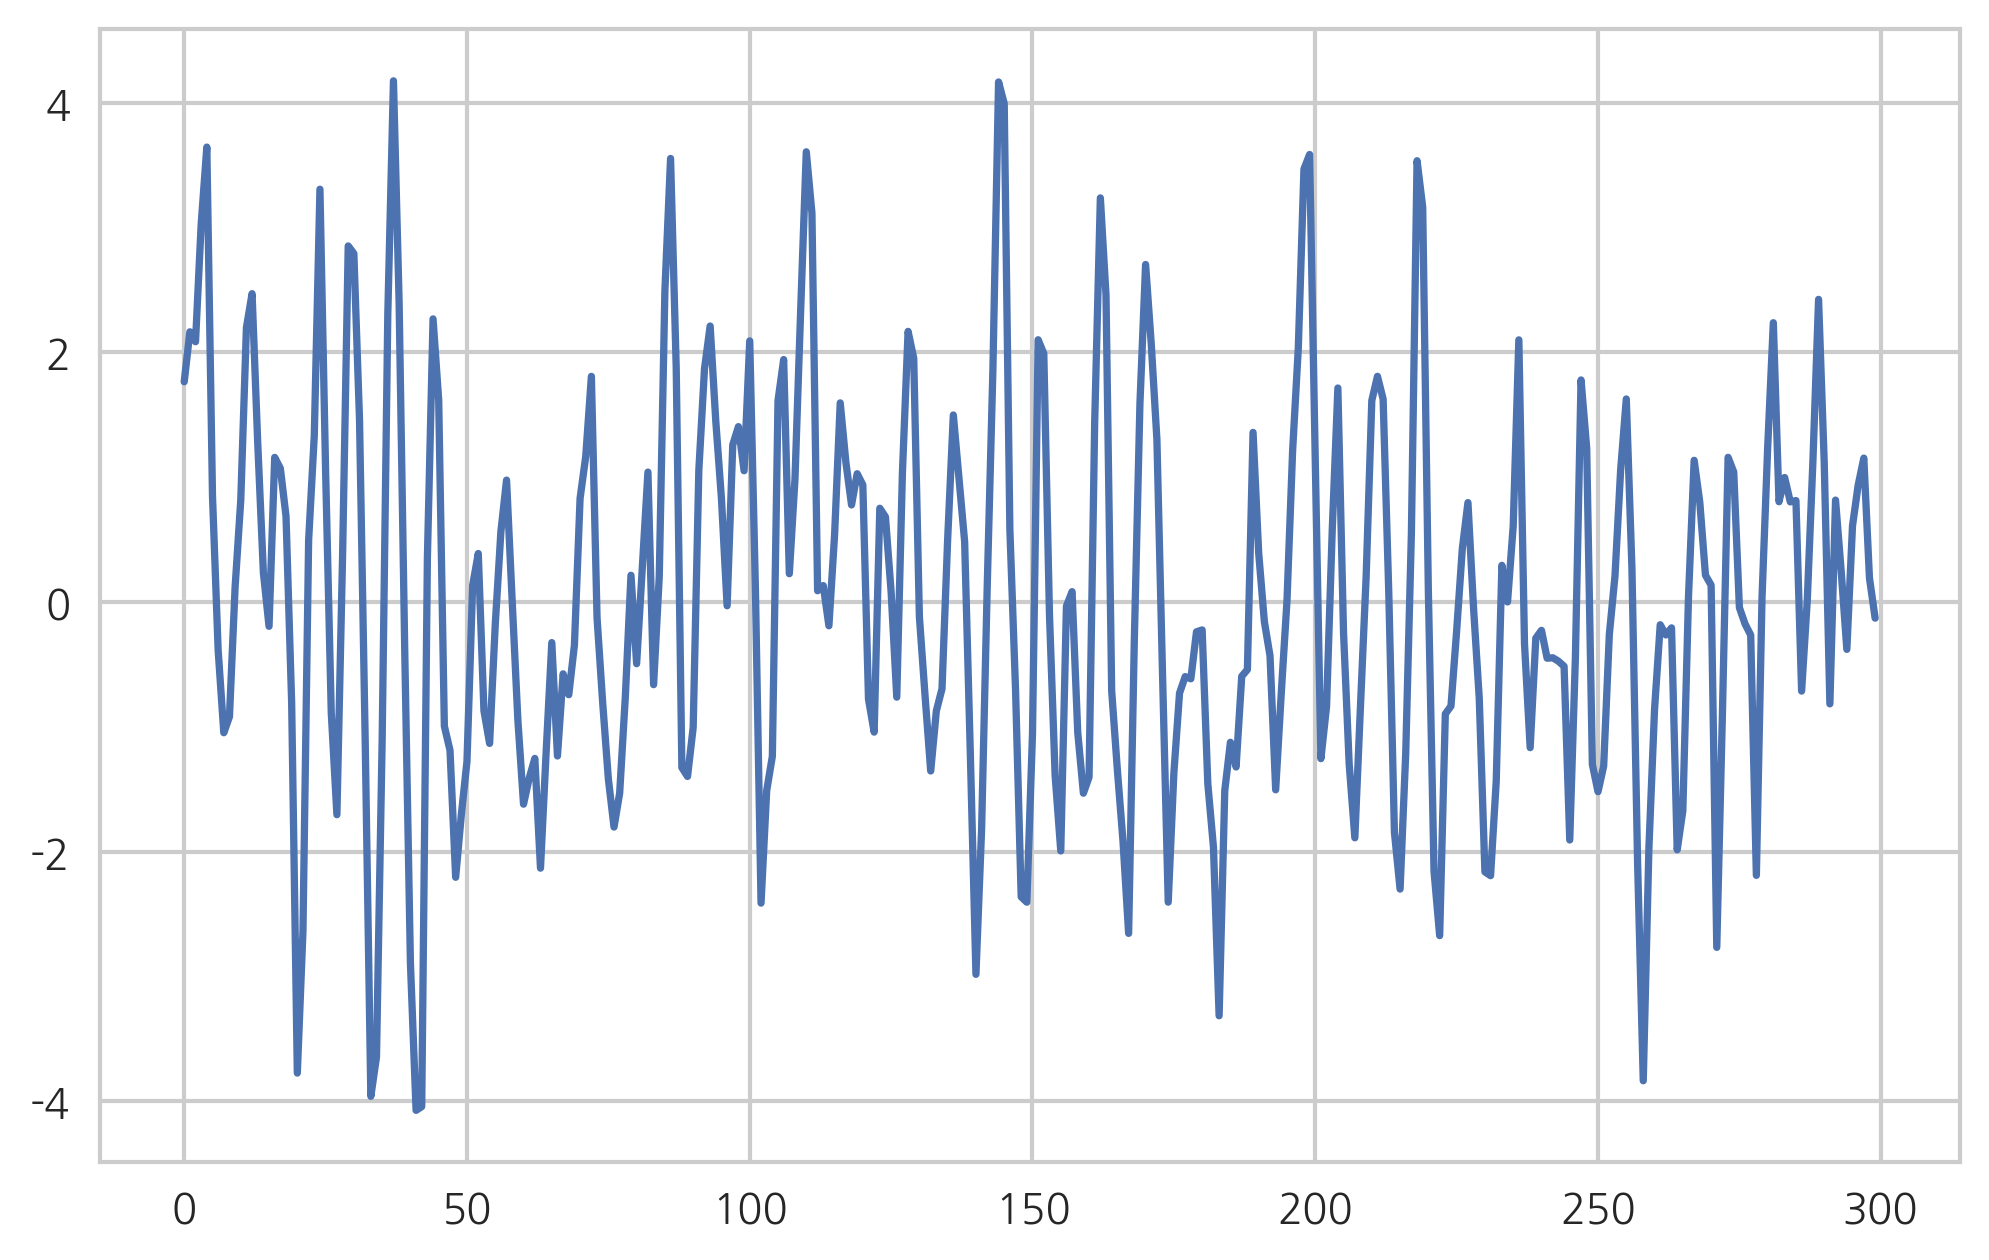

In [3]:
np.random.seed(0)
p1 = sm.tsa.ArmaProcess([1, -1, 0.6],[1])
y1 = p1.generate_sample(300)
plt.plot(y1)
plt.show()

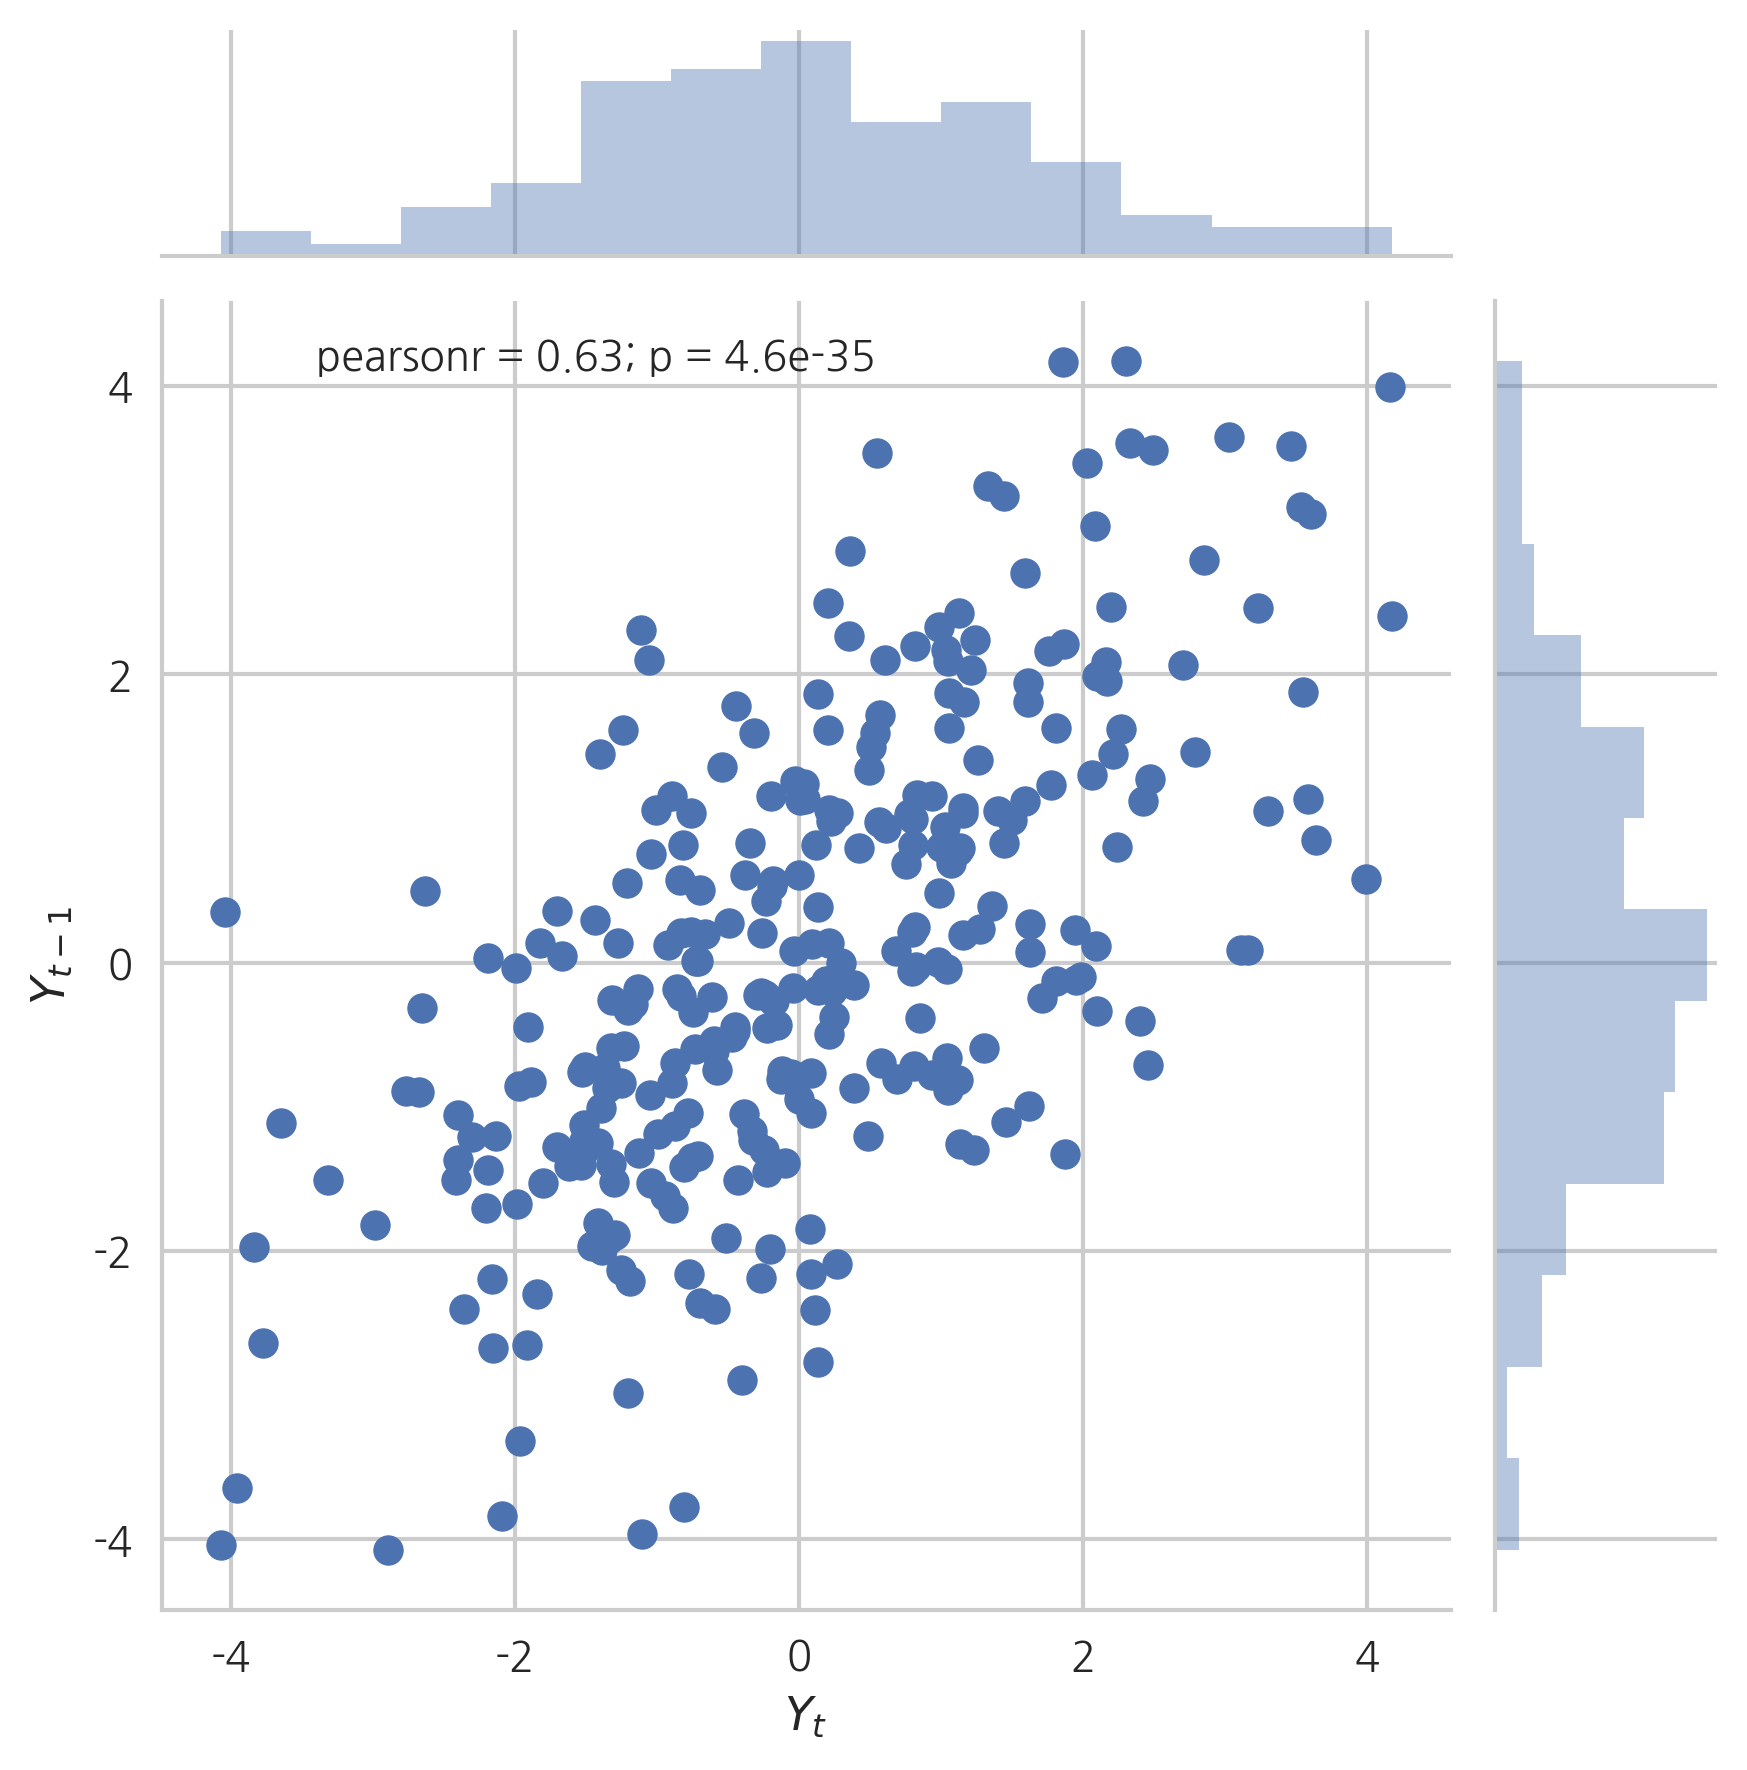

In [4]:
df = pd.DataFrame(np.c_[y1[:-1], y1[1:]])
df.columns = ["$Y_t$", "$Y_{t-1}$"]
sns.jointplot("$Y_t$", "$Y_{t-1}$", df)
plt.show()

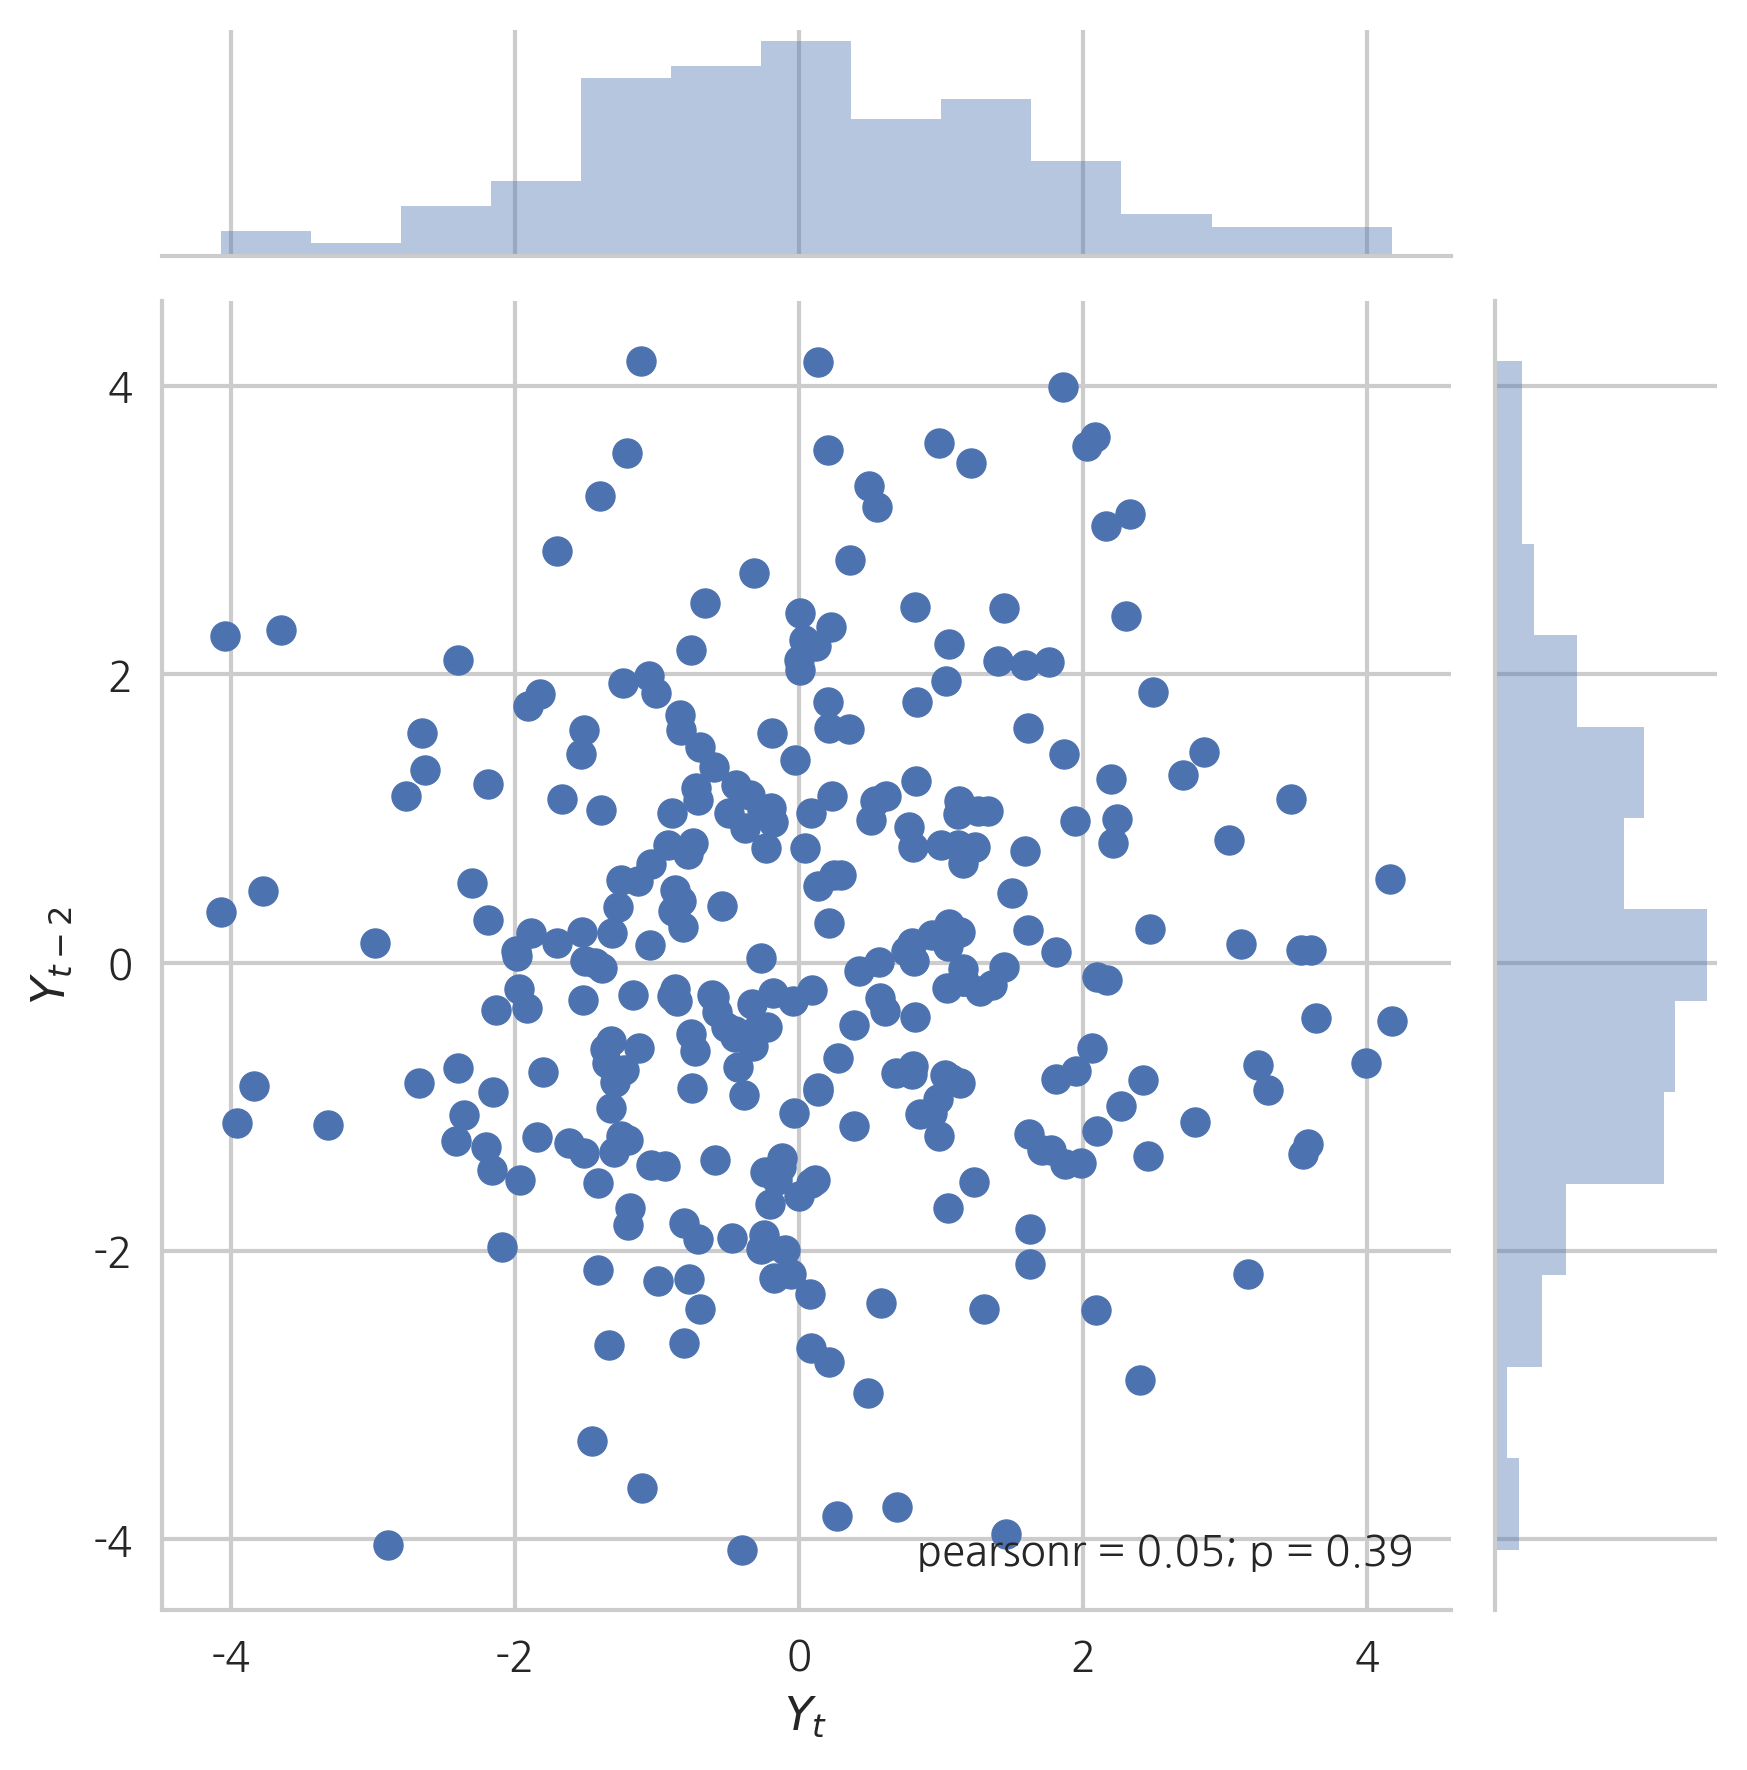

In [5]:
df = pd.DataFrame(np.c_[y1[:-2], y1[2:]])
df.columns = ["$Y_t$", "$Y_{t-2}$"]
sns.jointplot("$Y_t$", "$Y_{t-2}$", df)
plt.show()

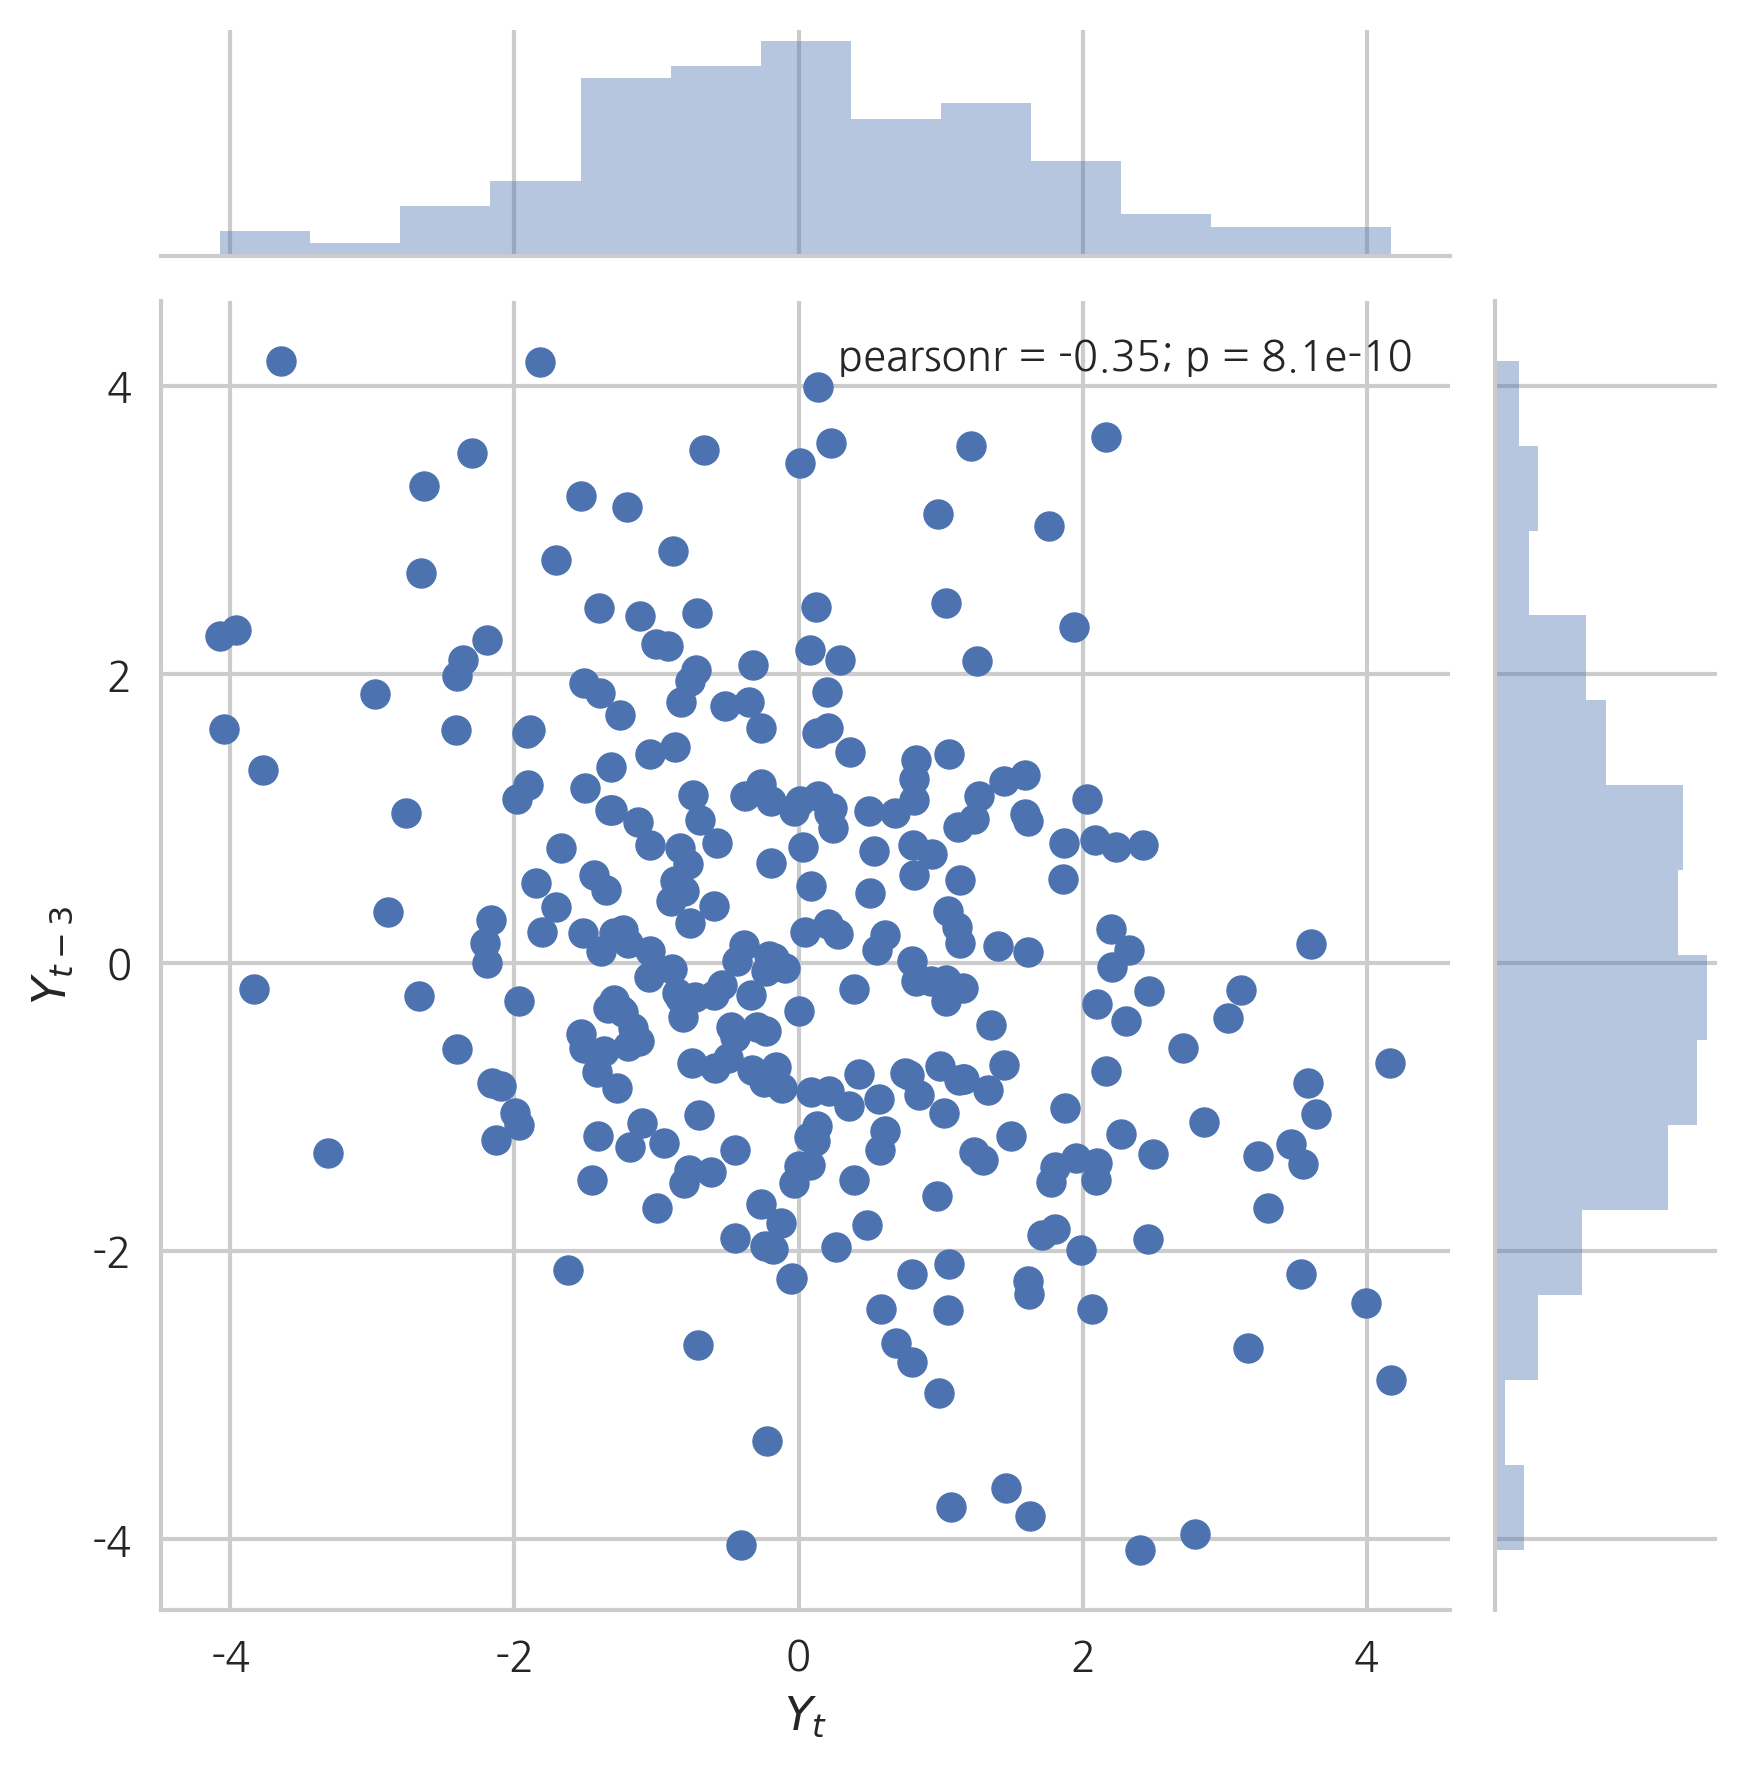

In [6]:
df = pd.DataFrame(np.c_[y1[:-3], y1[3:]])
df.columns = ["$Y_t$", "$Y_{t-3}$"]
sns.jointplot("$Y_t$", "$Y_{t-3}$", df)
plt.show()

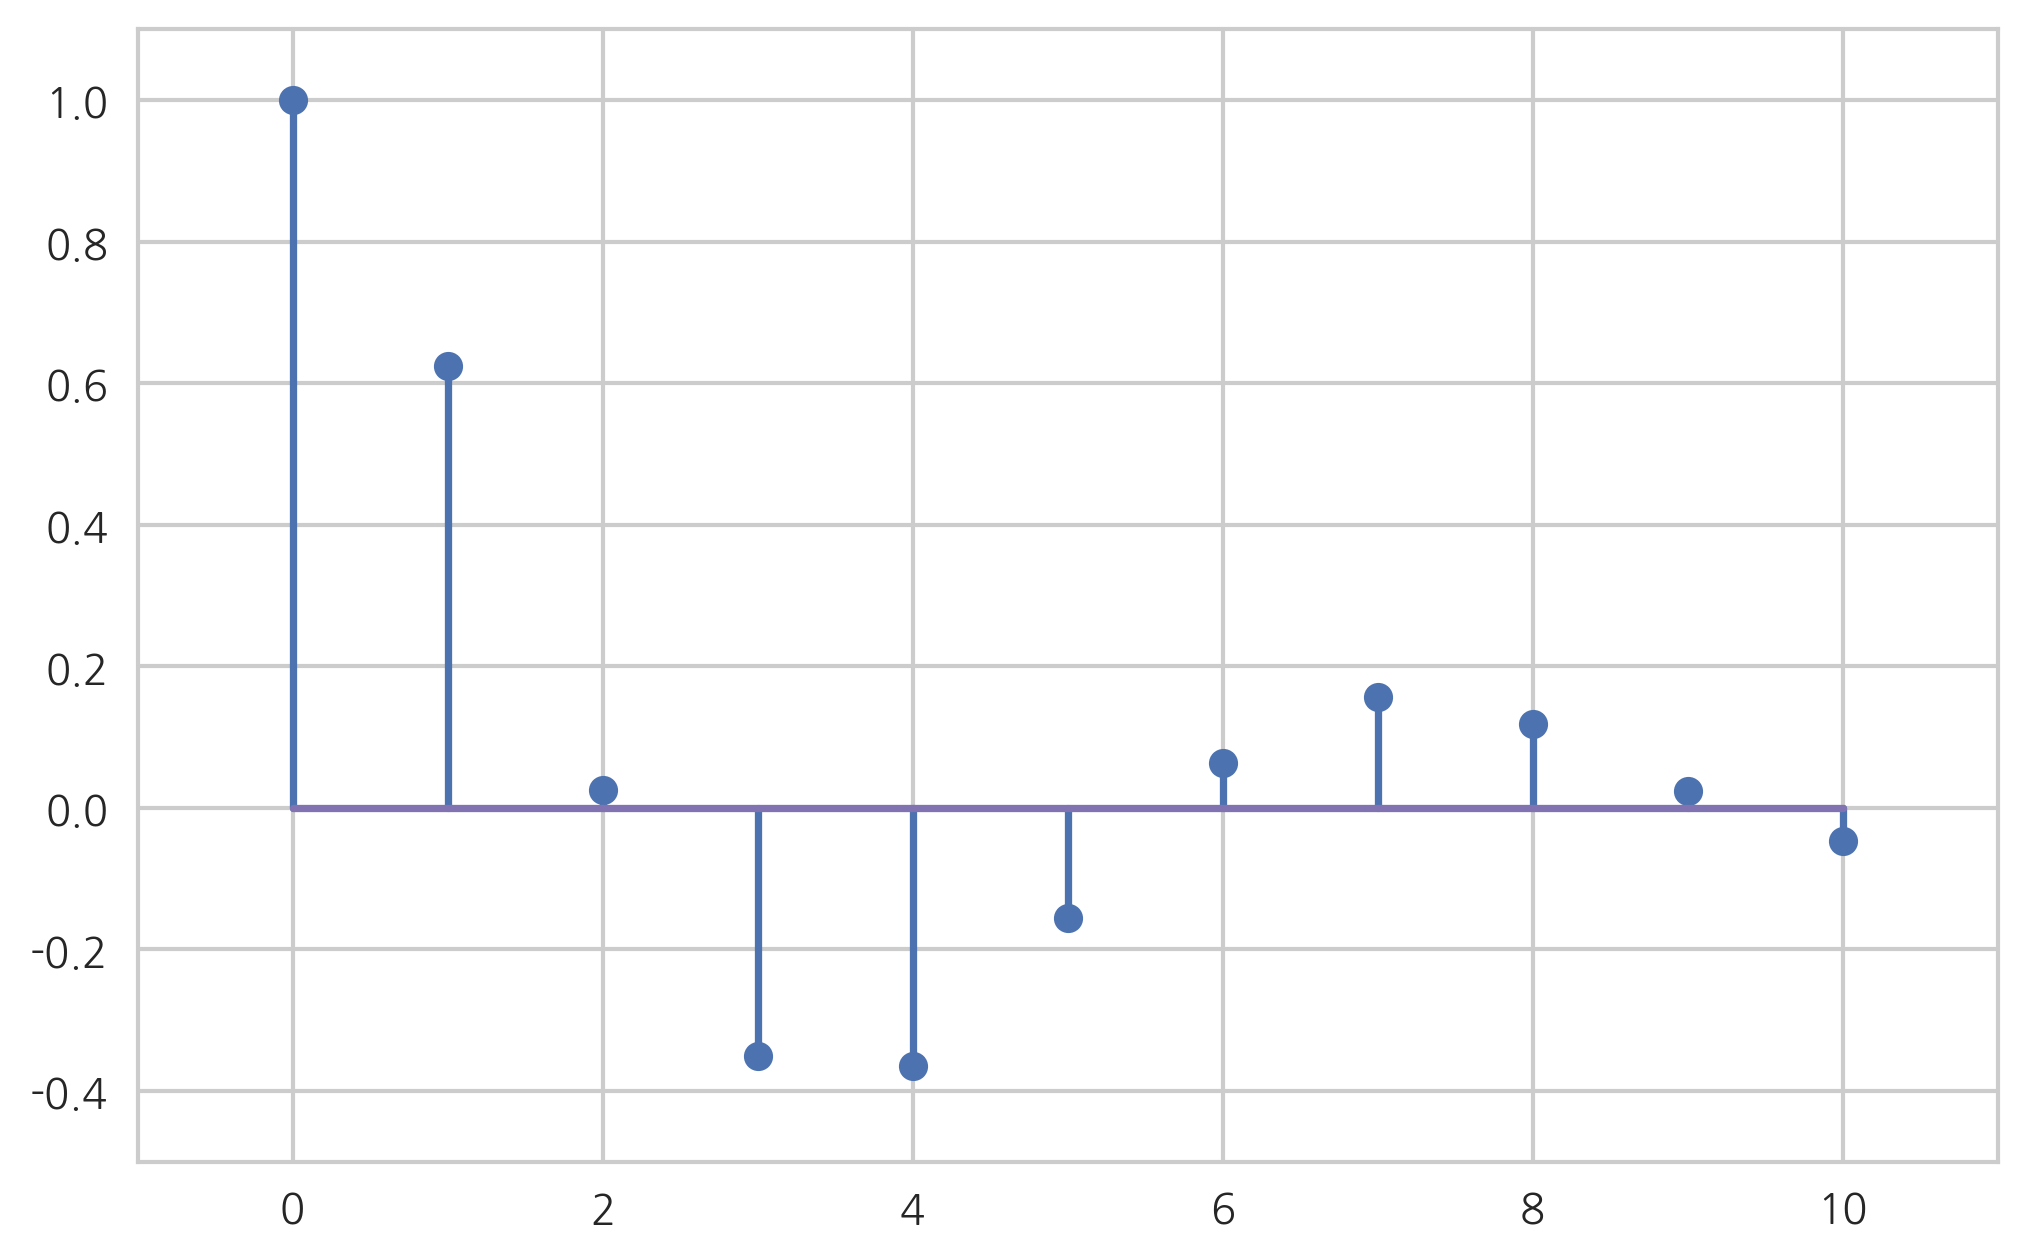

In [7]:
plt.stem(p1.acf(11))
plt.xlim(-1, 11)
plt.ylim(-0.5, 1.1)
plt.show()

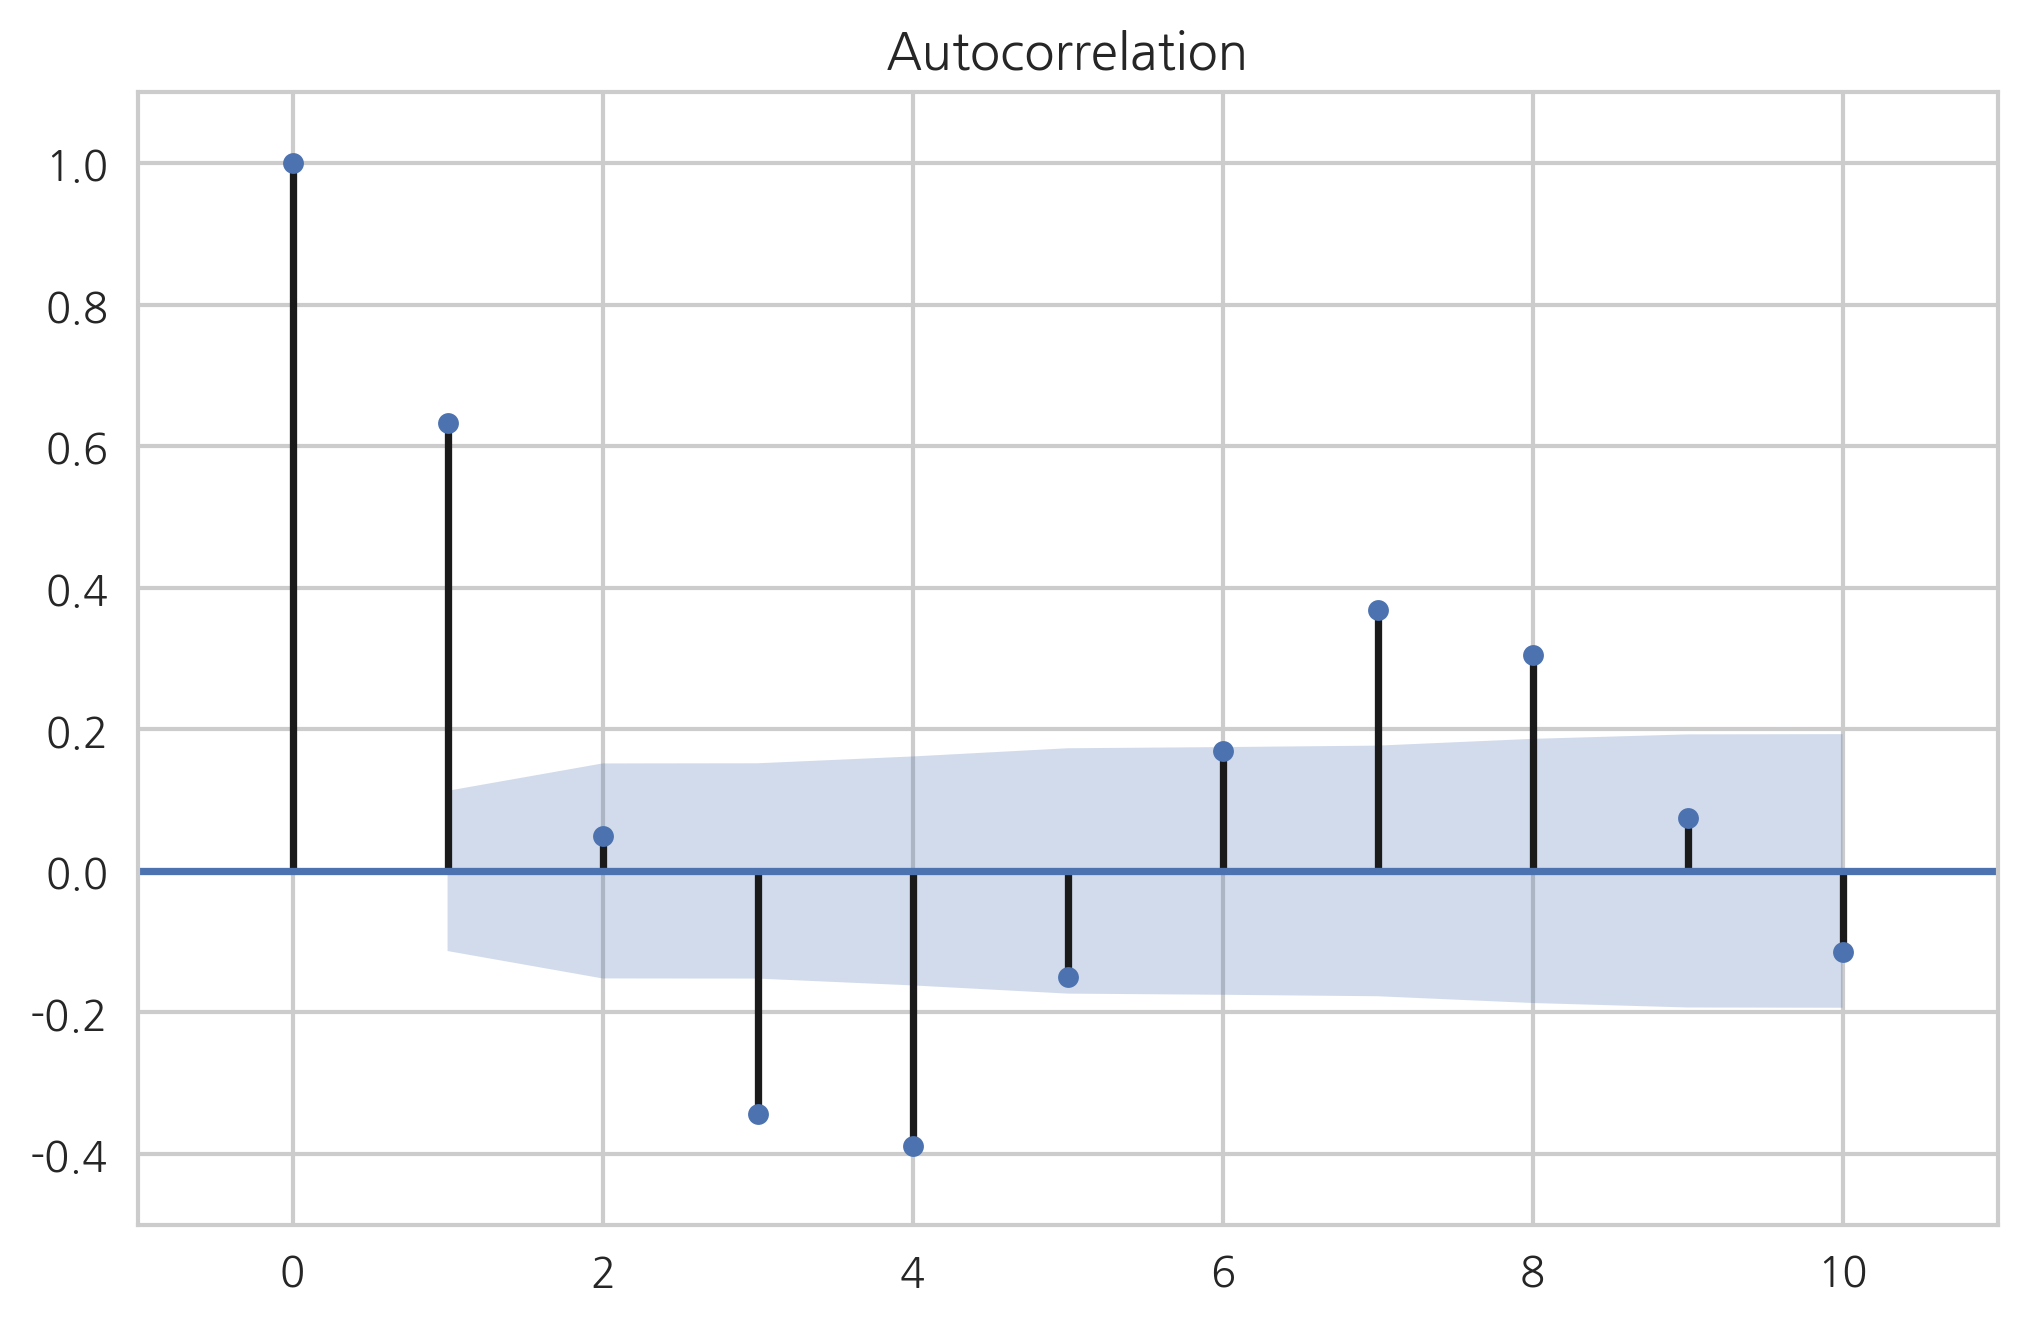

In [8]:
sm.graphics.tsa.plot_acf(y1, lags=10);
plt.xlim(-1, 11)
plt.ylim(-0.5, 1.1)
plt.show()